In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data/rls_data.csv')
print(data.head())
data = data[['x1', 'x2', 'x3', 'x4', 'y']].to_numpy()

     x1   x2    x3    x4      y
0  0.00  0.0  0.00  0.00  11.53
1  0.10  0.0  0.10  0.00   0.00
2  5.27  0.0  5.25  0.02   0.10
3  6.81  0.0  6.79  0.02  12.71
4  6.99  0.0  6.97  0.02   6.81


In [40]:
M = 4
N = 50

# xs = np.random.randn(M , N)
# ws = np.random.randn(M)
# ys = ws @ xs

xs = np.array([data[:, 0], data[:, 1], data[:, 2], data[:, 3],])
ys = data[:, 4]

# print(xs , ys)

x = xs.copy()
y = ys.copy()
wy = np.zeros(M)

In [41]:
for i in range(M):
    for j in range(i+1, M):
        wx = np.sum(x[j] * x[i])/np.sum(x[i]**2)
        pxj = wx * x[i]
        exj = x[j] - pxj
        x[j] = exj

for i in range(M-1, -1, -1):
    wy[i] = np.sum(y * x[i])/np.sum(x[i]**2)
    py = wy[i] * xs[i]
    ey = y - py
    y = ey

print(wy)

pred = wy @ xs

[ 1.73008549e+15 -1.73008549e+15 -1.73008549e+15 -1.73008549e+15]


(78,) (78,)


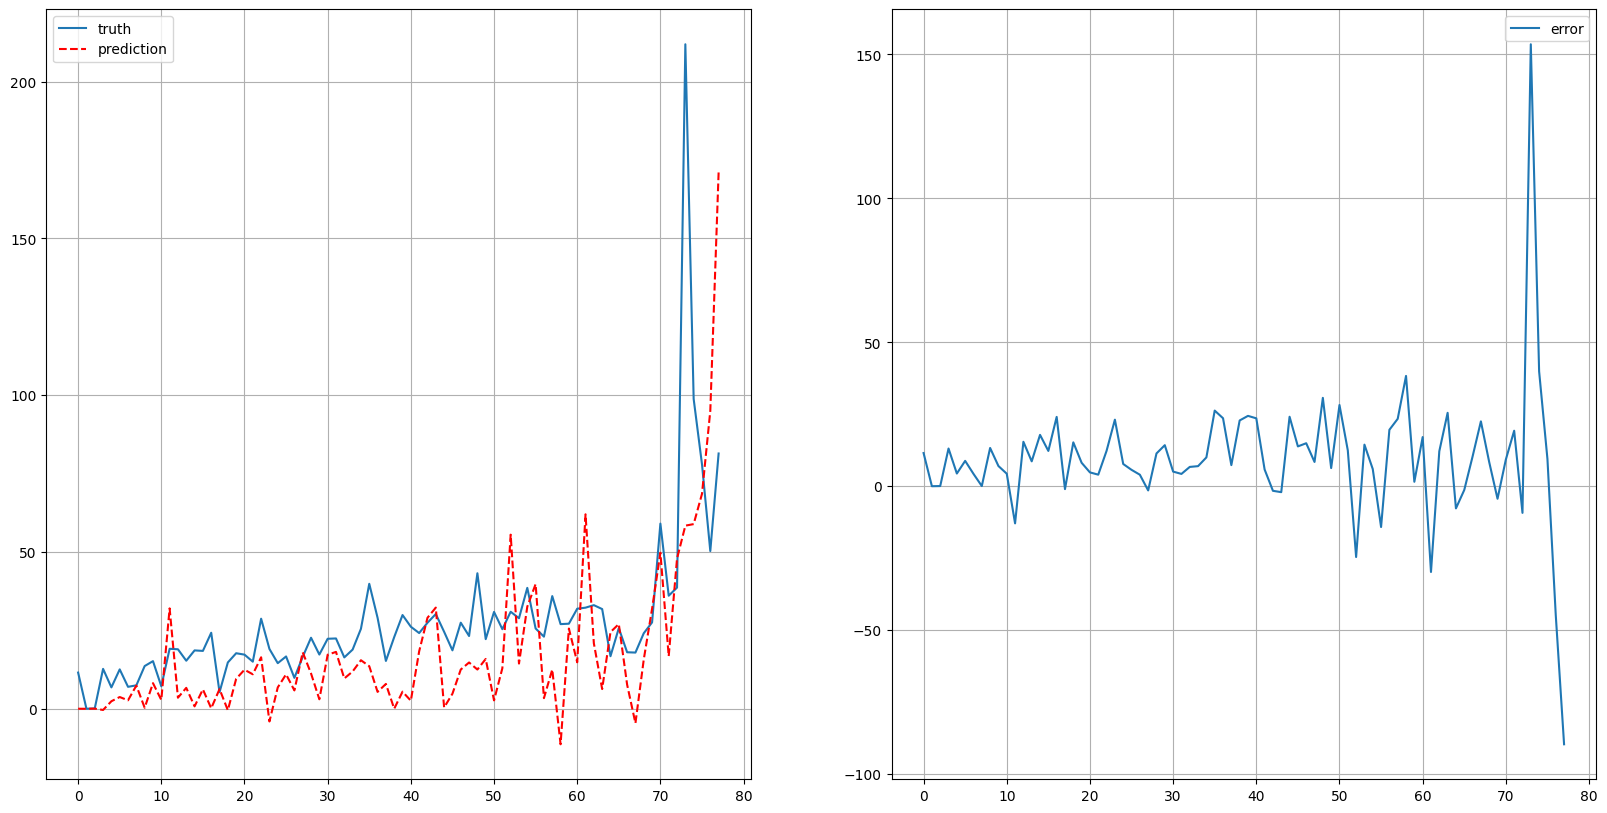

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(ys)
plt.plot(pred, 'r--')
plt.legend(["truth", "prediction"])
plt.subplot(1, 2, 2)
plt.grid()
print(ys.shape, pred.shape)
plt.plot(ys - pred)
plt.legend(["error",])
plt.show()

In [49]:
n_features = 4
w = np.zeros(n_features)
P = np.eye(n_features) * 1000  # Large initial covariance
lambda_ = 0.99  # Forgetting factor
data = pd.read_csv('data/rls_data_unsortted.csv')
# data = pd.read_csv('data/rls_data_2.csv')
# data = pd.read_csv('data/actual_data.csv')
print(f"data:\n{data.head()}")
print(f"w:\n{w}")
print(f"P:\n{P}")

data:
      x1   x2     x3    x4      y
0  14.57  0.0  14.51  0.06  15.31
1  15.31  0.0  15.29  0.02  14.76
2  14.76  0.0  14.72  0.04  18.60
3  18.60  0.0  18.55  0.05  17.28
4  17.28  0.0  17.22  0.06  14.53
w:
[0. 0. 0. 0.]
P:
[[1000.    0.    0.    0.]
 [   0. 1000.    0.    0.]
 [   0.    0. 1000.    0.]
 [   0.    0.    0. 1000.]]


In [50]:
# Storing predictions
y_pred = np.zeros(len(data))

# Initialize cost function array
J_t = np.zeros(len(data))

# RLS algorithm
for t in range(len(data)):
    x_t = data.iloc[t, :-1].values
    y_t = data.iloc[t, -1]

    y_pred[t] = np.dot(x_t, w)
    error = y_t - y_pred[t]
    
    K_t = np.dot(P, x_t) / (lambda_ + np.dot(x_t.T, np.dot(P, x_t)))
    w += K_t * error
    P = (P - np.outer(K_t, np.dot(x_t.T, P))) / lambda_

    # Compute the cost function J_t(w)
    # TODO: The bellow needs opt
    J_t[t] = np.sum([lambda_**(t-i) * (data.iloc[i, -1] - np.dot(data.iloc[i, :-1].values, w))**2 for i in range(t+1)])


print(w)

[ 9.7513845   6.04933869 -9.14382019 12.84586601]


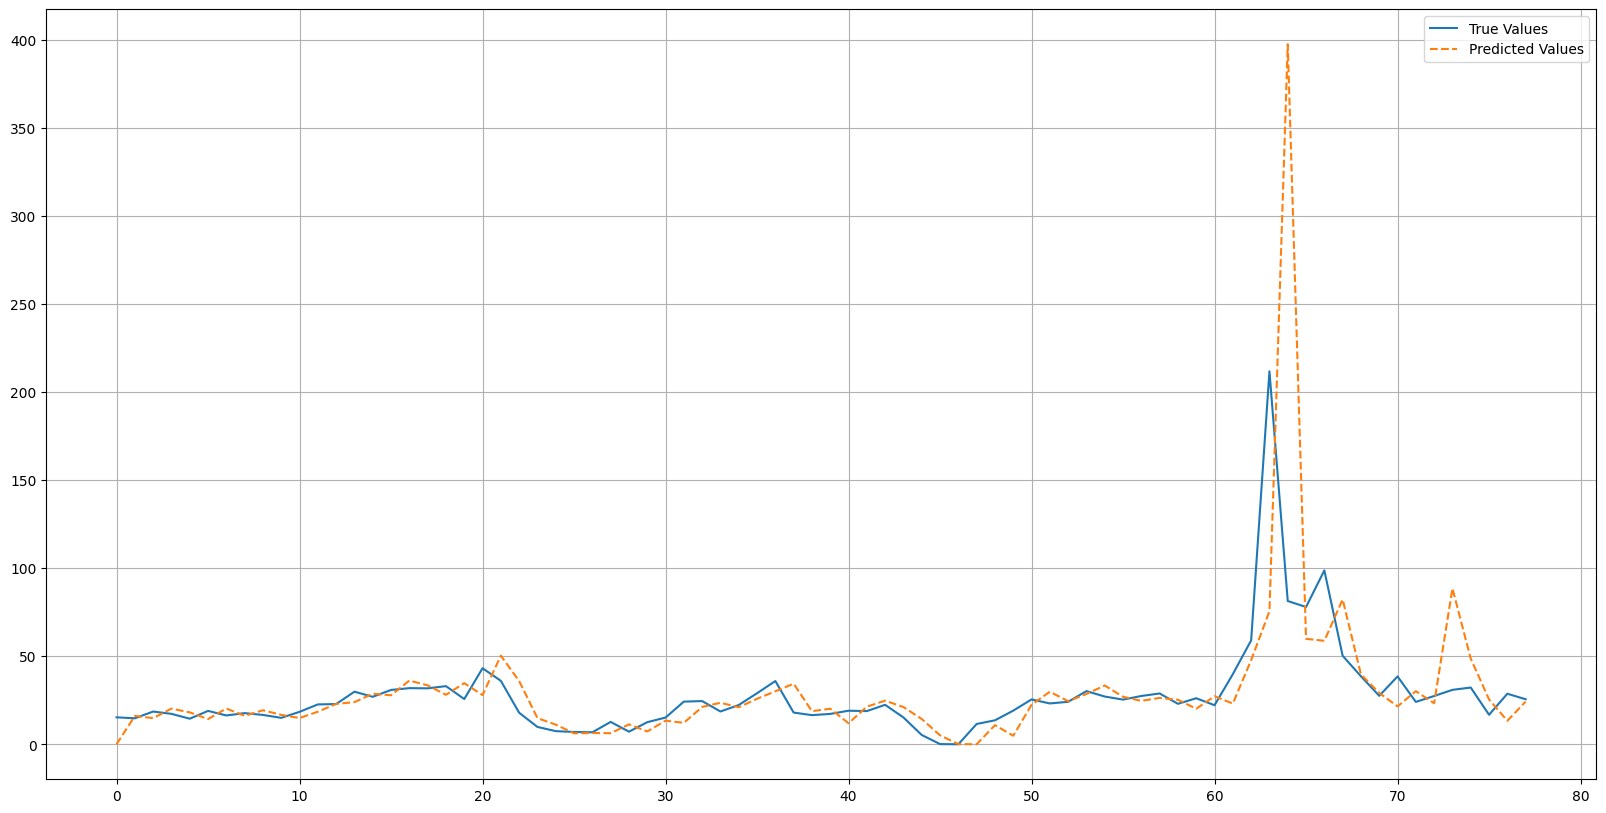

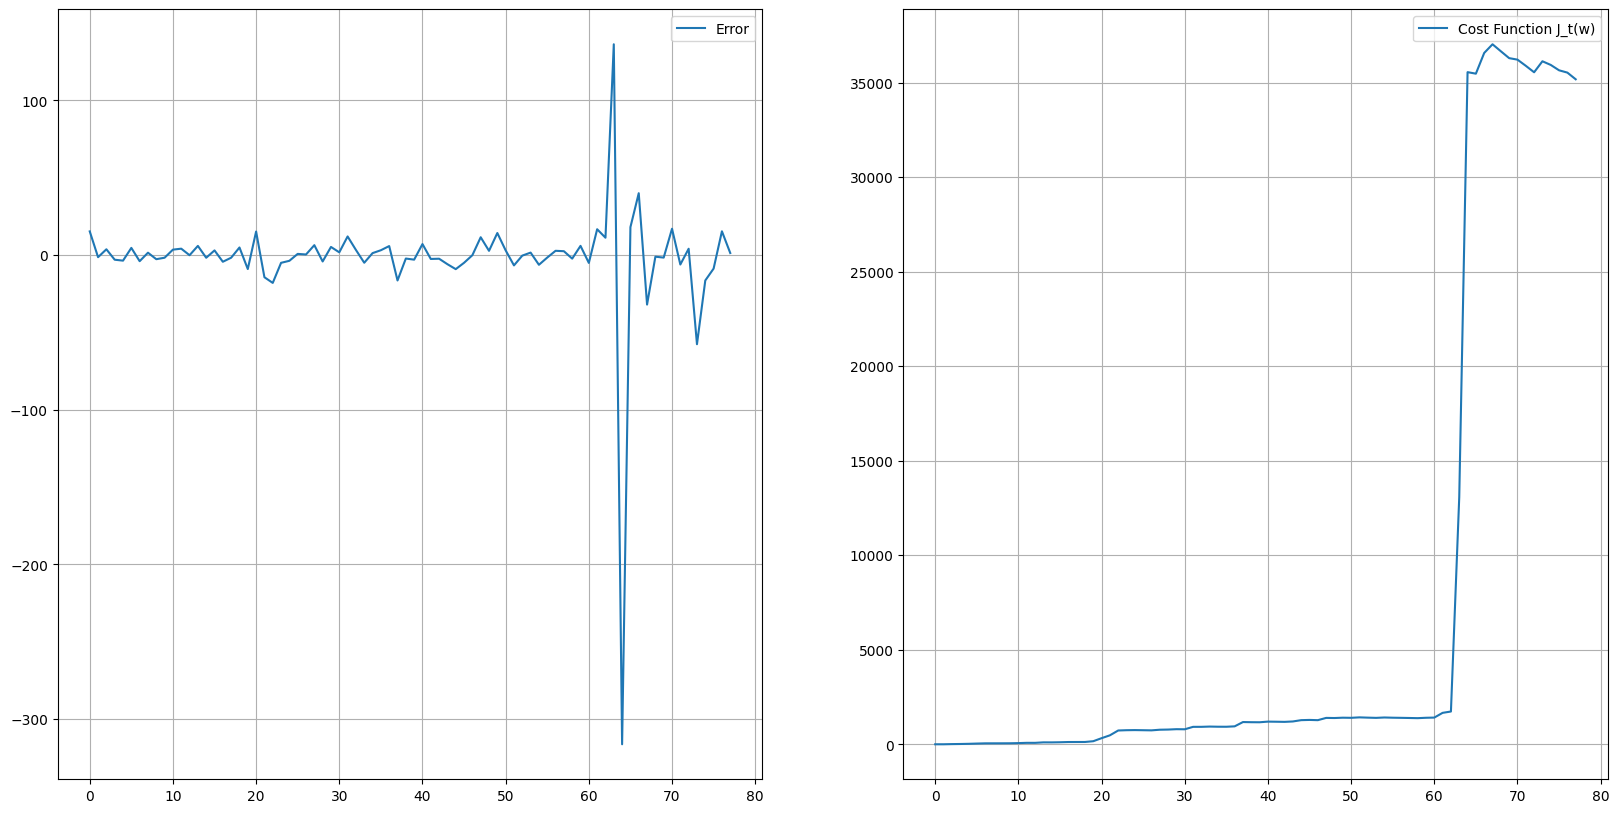

In [51]:
# Plotting true vs predicted values
plt.subplots(1, 1, figsize=(20, 10))
plt.grid()
plt.plot(data.index, data['y'], label='True Values')
plt.plot(data.index, y_pred, label='Predicted Values', linestyle='--')
# plt.xlabel('Index')
# plt.ylabel('y')
plt.legend()
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(data['y'] - y_pred, label='Error')
plt.legend()
# Plot cost function
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(len(data)), J_t, label='Cost Function J_t(w)')
plt.legend()
plt.show()